<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/eda/Heart_Analysis_EDA%20_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Ejercicio EDA</center>

# Introducción

##  Dataset:
   <p style='text-align:justify;'> Las enfermedades cardiovasculares matan aproximadamente a 17 millones de personas en todo el mundo cada año y se manifiestan principalmente como infartos de miocardio e insuficiencias cardíacas. La insuficiencia cardíaca (IC) ocurre cuando el corazón no puede bombear suficiente sangre para satisfacer las necesidades del cuerpo.
En este proyecto, analizamos un conjunto de datos que contiene los registros médicos de 299 pacientes con insuficiencia cardíaca. Consiste en 105 mujeres y 194 hombres con edades comprendidas entre 40 y 95 años. Los 299 pacientes tenían disfunción sistólica ventricular izquierda y habían tenido insuficiencias cardíacas previas. Este conjunto de datos contiene 13 características, que informan sobre situaciín clínica, corporal y de estilo de vida de un paciente, a saber, edad, anemia, presión arterial alta, creatinina fosfoquinasa (CPK), diabetes, fracción de eyección de sangre, sexo, plaquetas, creatinina sérica, sodio sérico, hábito de fumar, etc.</p>
       






In [88]:
# Importqmow librerías.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [89]:
# Leemos los datos.
heart_data = pd.read_csv('https://drive.google.com/uc?id=1rH4INvIkY7umN6VGh2iw_nIxF2ckbRlj')

In [90]:
# Primeras 5 filas
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [91]:
# Print últimas 5 filas
heart_data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## 1.-  Acciones Básicas. Se quiere que las columnas booleanas tengan valores Yes/No y el sexo Male/Female. Los cambios realizados deben constituir un nuevo conjunto de datos al que llamaremos **df_eda.**



1. **Anaemia:** 0 -> No || 1 -> Yes
2. **diabetes:** 0 -> No || 1 -> Yes
3. **high_blood_pressure:** 0 -> No || 1 -> Yes
4. **sex:** 0 -> Female || 1 -> Male
5. **smoking:** 0 -> No || 1 -> Yes
6. **DEATH_EVENT:** 0 -> No || 1 -> Yes


In [79]:
df_eda = pd.DataFrame()

In [93]:
df_eda["age"] = heart_data["age"]
df_eda["anaemia"] = np.where(heart_data["anaemia"] < 1, "No", "Yes")
df_eda["creatinine_phosphokinase"] = heart_data["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(heart_data["diabetes"] < 1, "No", "Yes")
df_eda["ejection_fraction"] = heart_data["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(heart_data["high_blood_pressure"] < 1, "No", "Yes")
df_eda["platelets"] = heart_data["platelets"]
df_eda["serum_creatinine"] = heart_data["serum_creatinine"]
df_eda["serum_sodium"] = heart_data["serum_sodium"]
df_eda["sex"] = np.where(heart_data["sex"] < 1, "Female", "Male")
df_eda["smoking"] = np.where(heart_data["smoking"] < 1, "No", "Yes")
df_eda["death_event"] = np.where(heart_data["DEATH_EVENT"] < 1, "No", "Yes")
df_eda["time"] = heart_data["time"]
df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event,time
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,Yes,4
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,Yes,6
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,Yes,7
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,Yes,7
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,Yes,8


In [94]:
# 1.- Obtener una visión en conjunto de los datos
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  death_event               299 non-null    object 
 12  time                      299 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [95]:
# 2.- Cuántas filas y columnas tenemos?
print(df_eda.shape[0], " filas" )
print(df_eda.shape[1]," columnas")

299  filas
13  columnas


In [96]:
# 3.- Qué tipo de dato corresponde a cada columna?
# Qué columnas son nunéricas y cuáles categóricas ?
# tipo de dato de cada columna
print(df_eda.dtypes)
# Clasificar las columnas como numéricas o categóricas
numericas = df_eda.select_dtypes(include=np.number).columns.tolist()
categoricas = df_eda.select_dtypes(include=['object']).columns.tolist()

print("\nColumnas numéricas:", numericas)
print("\nColumnas categóricas:", categoricas)

age                         float64
anaemia                      object
creatinine_phosphokinase      int64
diabetes                     object
ejection_fraction             int64
high_blood_pressure          object
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                      object
death_event                  object
time                          int64
dtype: object

Columnas numéricas: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Columnas categóricas: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']


In [97]:
# 4.-  Existen valores duplicados ? Si es así eliminarlos
# Buscar valores duplicados
duplicate_rows = df_eda[df_eda.duplicated()]

# Imprimir filas duplicadas
print("Filas duplicadas:")
print(duplicate_rows)

# Eliminar filas duplicadas (si existen) y crear un nuevo DataFrame
df_eda = df_eda.drop_duplicates()

Filas duplicadas:
Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, death_event, time]
Index: []


In [98]:
# 5.- Existen valores nulos? si es así, 1uitarlos del conjunto de datos
# Verificar si hay valores nulos en el DataFrame
print(df_eda.isnull().sum())

# Si hay valores nulos, eliminarlos
df_eda = df_eda.dropna()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
death_event                 0
time                        0
dtype: int64


In [99]:
# 6.- Remover la columna "time" que no se va a utilizar
df_eda.drop('time', axis=1, inplace = True)

##2.- Análisis Exploratorio

In [100]:
# 1.- Cuántas observaciones corresponden a mujeres y cúantas a hombre
df_eda["sex"].value_counts()

,count
sex,
Male,194
Female,105


In [101]:
#2.- Cuántos fumadores hay en el conjunto de datos
df_eda["smoking"].value_counts()

,count
smoking,
No,203
Yes,96


In [102]:
#3.- Cuántas personas en la muestra tienen diabetes?
df_eda["diabetes"].value_counts()

,count
diabetes,
No,174
Yes,125


In [103]:
# 4.- Cuántas personas tiene la tensión alta?
df_eda["high_blood_pressure"].value_counts()

,count
high_blood_pressure,
No,194
Yes,105


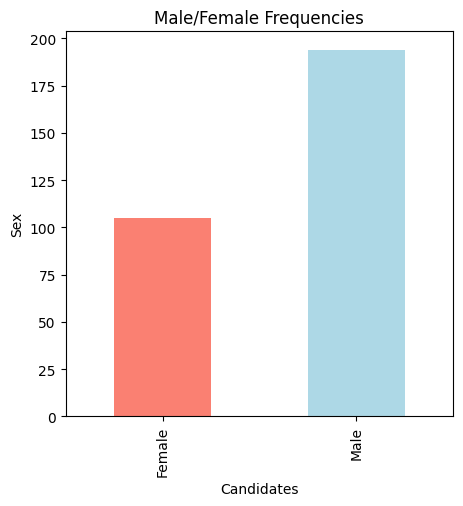

In [106]:
# 5.- Hacer una gráfica que muestre la distribución de sexo en la muestra
plt.figure(figsize=(5,5))
figure_1 = df_eda["sex"].value_counts(ascending = True).plot.bar(color=["salmon", "lightblue"])
plt.title("Male/Female Frequencies")
plt.ylabel("Sex")
plt.xlabel("Candidates")
plt.show()

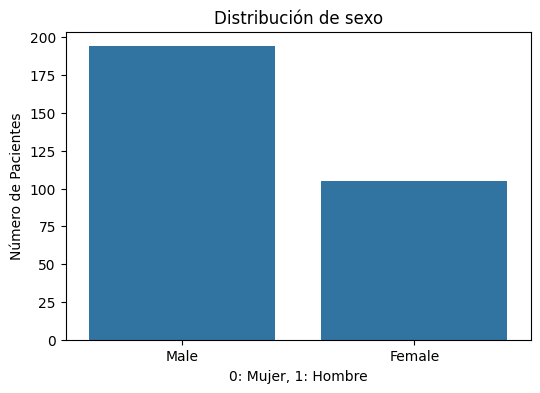

In [105]:
# Crear la gráfica
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df_eda)
plt.title('Distribución de sexo')
plt.xlabel('0: Mujer, 1: Hombre')
plt.ylabel('Número de Pacientes')
plt.show()

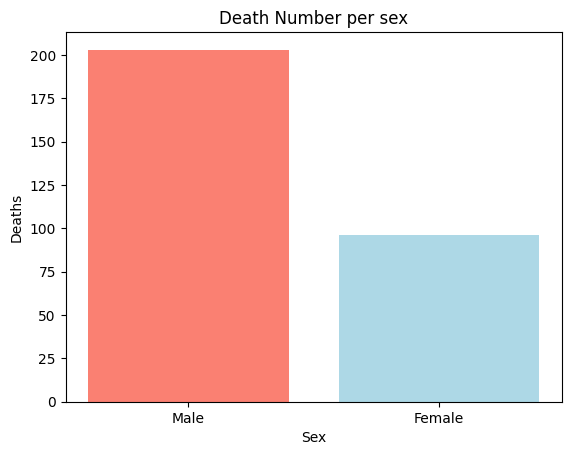

In [107]:
# 6.- hagamos una gráfica para ver "dead events" de acuerdo al sexo
figure_3 = plt.bar(df_eda["sex"].value_counts().index, df_eda["death_event"].value_counts(), color=["salmon", "lightblue"])
plt.title("Death Number per sex")
plt.xlabel("Sex")
plt.ylabel("Deaths")
plt.show()

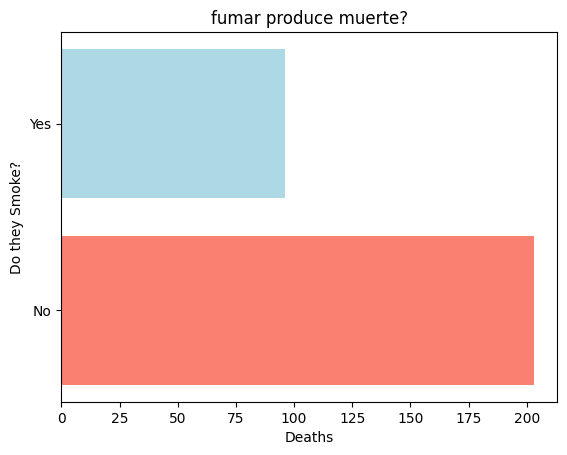

In [109]:
# 7.- hagamos una gráfica para ver "dead events" de acuerdo a  si son fumadores o no
figure_4 = plt.barh(df_eda["smoking"].value_counts().index,df_eda["death_event"].value_counts(), color=["salmon", "lightblue"])
plt.title("fumar produce muerte?")
plt.xlabel("Deaths")
plt.ylabel("Do they Smoke?")
plt.show()

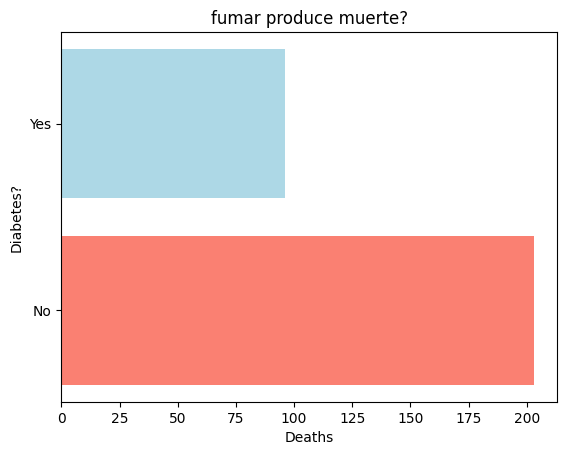

In [111]:
# 8.- hagamos una gráfica para ver "dead events" de acuerdo a  la diabetes
figure_5 = plt.barh(df_eda["diabetes"].value_counts().index,df_eda["death_event"].value_counts(), color=["salmon", "lightblue"])
plt.title("fumar produce muerte?")
plt.xlabel("Deaths")
plt.ylabel("Diabetes?")
plt.show()

In [119]:
# 9.- Existe una correlación entre "dead_event" y ·diabetes"?, cuánto vale ?
correlacion = heart_data['DEATH_EVENT'].corr(heart_data['diabetes'])
print(f"La correlación entre 'dead_event' y 'diabetes' es: {correlacion}")

La correlación entre 'dead_event' y 'diabetes' es: -0.001942883344203445


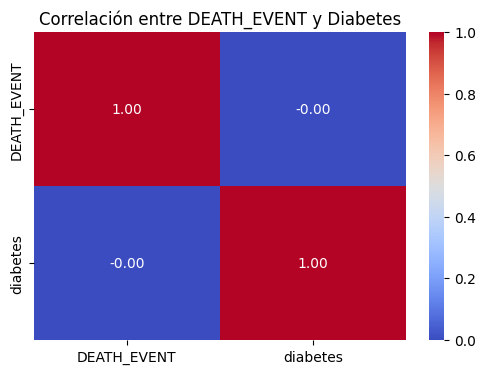

In [125]:
# Visualizar la correlación con un mapa de calor
correlation_matrix = heart_data[['DEATH_EVENT', 'diabetes']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre DEATH_EVENT y Diabetes')
plt.show()

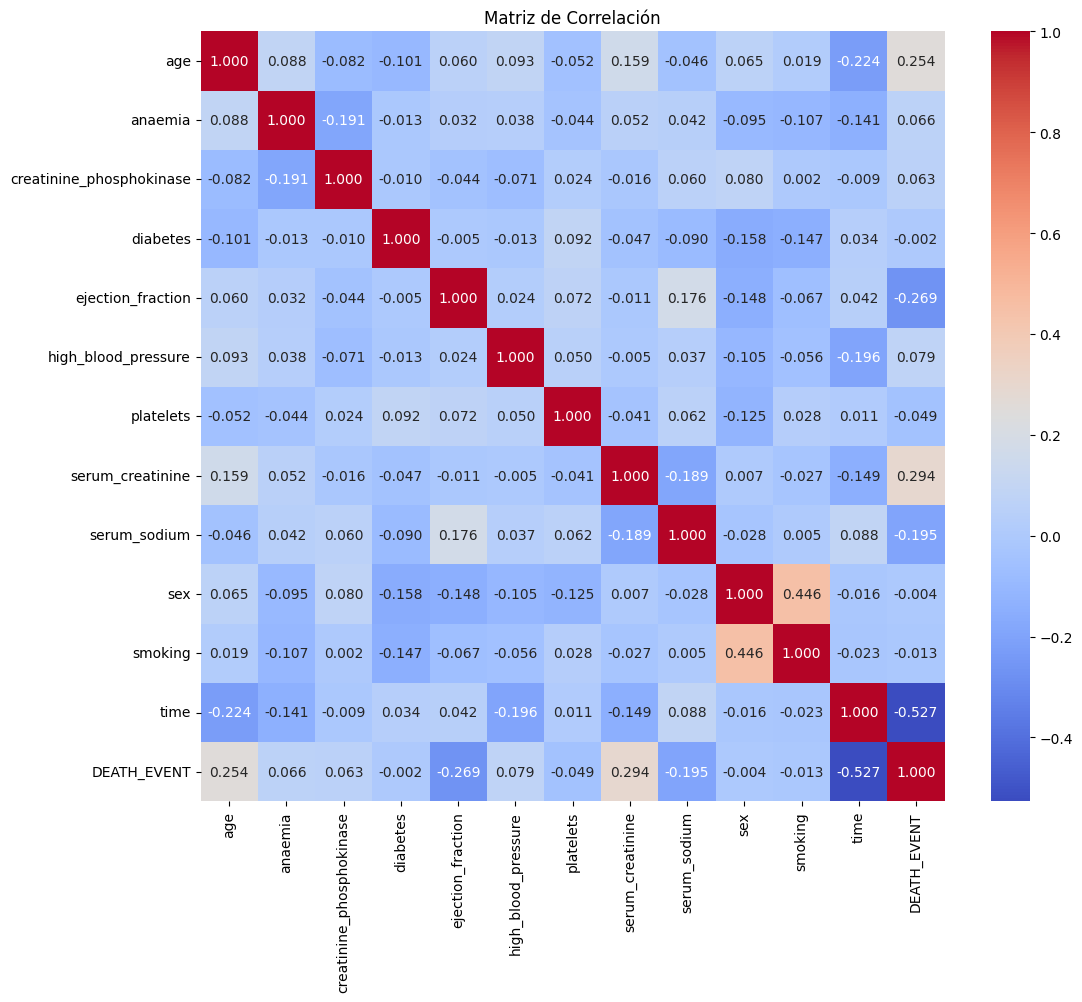

In [126]:
# 10 Obtengamos la matriz de correlaciones entre todas las variables numéricas del conjunto de datos (original)
# Graficar el mapa de calor con estos valores
matriz_de_correlacion = heart_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Matriz de Correlación')
plt.show()